In [26]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv(r"C:\Users\manee\Downloads\AAPL.csv") # loading data

In [5]:
df.shape

(251, 7)

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-15,209.220001,210.740005,208.330002,210.240005,207.027420,28807600
1,2018-08-16,211.750000,213.809998,211.470001,213.320007,210.060333,28500400
2,2018-08-17,213.440002,217.949997,213.160004,217.580002,214.255234,35427000
3,2018-08-20,218.100006,219.179993,215.110001,215.460007,212.167633,30287700
4,2018-08-21,216.800003,217.190002,214.029999,215.039993,211.754028,26159800


In [7]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [9]:
# convert the date column to datetime datatype
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [11]:
# making Date column as index
df.set_index('Date', inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-08-15 to 2019-08-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [13]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-15,209.220001,210.740005,208.330002,210.240005,207.027420,28807600
2018-08-16,211.750000,213.809998,211.470001,213.320007,210.060333,28500400
2018-08-17,213.440002,217.949997,213.160004,217.580002,214.255234,35427000
2018-08-20,218.100006,219.179993,215.110001,215.460007,212.167633,30287700
2018-08-21,216.800003,217.190002,214.029999,215.039993,211.754028,26159800


In [14]:
# sorting indexes
df.sort_index(inplace = True)

In [15]:
# data normalization
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [19]:
scaler_values = scaler.fit_transform(df[df.columns])

In [20]:
scaler_values

array([[0.75161293, 0.74096871, 0.75563913, 0.7571206 , 0.75577275,
        0.20552114],
       [0.78076039, 0.77595438, 0.79141036, 0.79138853, 0.79023062,
        0.20190211],
       [0.80023046, 0.82313386, 0.81066308, 0.838785  , 0.83789019,
        0.28350221],
       ...,
       [0.64101379, 0.64193734, 0.65105941, 0.64853127, 0.68138544,
        0.13091759],
       [0.65714293, 0.75692305, 0.66621094, 0.7429906 , 0.77784302,
        0.42241417],
       [0.6817973 , 0.69196582, 0.69024831, 0.67378721, 0.70717566,
        0.29559037]])

In [21]:
df_scaled = pd.DataFrame(scaler_values, columns = df.columns, index = df.index)

In [22]:
df_scaled

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-15,0.751613,0.740969,0.755639,0.757121,0.755773,0.205521
2018-08-16,0.780760,0.775954,0.791410,0.791389,0.790231,0.201902
2018-08-17,0.800230,0.823134,0.810663,0.838785,0.837890,0.283502
2018-08-20,0.853917,0.837151,0.832878,0.815198,0.814172,0.222958
2018-08-21,0.838940,0.814473,0.820574,0.810525,0.809473,0.174328
...,...,...,...,...,...,...
2019-08-08,0.647696,0.658803,0.653794,0.681353,0.706153,0.184338
2019-08-09,0.660369,0.650028,0.652654,0.654206,0.687180,0.156185
2019-08-12,0.641014,0.641937,0.651059,0.648531,0.681385,0.130918


In [23]:
# plotting the columns
import matplotlib.pyplot as plt

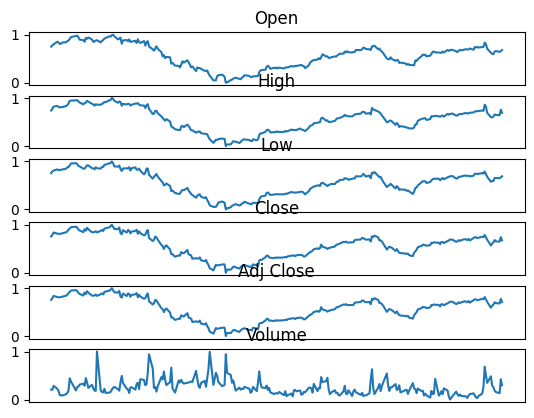

In [25]:
plt.rcParams['figure.figsize'] == (15,15)
figure, axes = plt.subplots(6)

for ax, col in zip(axes, df_scaled.columns):
    ax.plot(df_scaled[col])
    ax.set_title(col)
    ax.axes.xaxis.set_visible(False)

In [30]:
# creating the sliding window sequences

def create_sequences (data, window_size):
    x = []
    y = []
    for i in range (window_size, len(data)):
        x.append(data.iloc[i-window_size: i].values)
        y.append(data.iloc[i].values)
    return np.array(x), np.array(y)

In [31]:
window_size = 60
x, y = create_sequences(df_scaled,window_size )

In [33]:
x.shape, y.shape

((191, 60, 6), (191, 6))

In [34]:
# Train test split

from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [37]:
from tensorflow import keras

In [41]:
    model = keras.Sequential([
    keras.layers.LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])),
    keras.layers.Dropout(0.3),  # Dropout for regularization

    keras.layers.LSTM(units=50, return_sequences=True),
    keras.layers.Dropout(0.3),

    keras.layers.LSTM(units=50, return_sequences=False),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(y_train.shape[1])  
])


C:\Users\manee\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['RootMeanSquaredError'])

In [43]:
# early stopping condition
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
early_stopping = EarlyStopping(monitor = "val_loss", patience = 10, restore_best_weights = True)

In [46]:
lstm_model = model.fit(x_train, y_train, validation_split = 0.2, epochs = 100, batch_size = 3,callbacks = [early_stopping] )

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - RootMeanSquaredError: 0.3358 - loss: 0.1170 - val_RootMeanSquaredError: 0.1556 - val_loss: 0.0242
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - RootMeanSquaredError: 0.1820 - loss: 0.0332 - val_RootMeanSquaredError: 0.1226 - val_loss: 0.0150
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - RootMeanSquaredError: 0.1581 - loss: 0.0250 - val_RootMeanSquaredError: 0.1128 - val_loss: 0.0127
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - RootMeanSquaredError: 0.1298 - loss: 0.0169 - val_RootMeanSquaredError: 0.1664 - val_loss: 0.0277
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - RootMeanSquaredError: 0.1474 - loss: 0.0219 - val_RootMeanSquaredError: 0.0930 - val_loss: 0.0086
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - RootMeanSquaredError: 0.1269 - loss: 0.0162 - val_RootMeanSquaredError: 0.1459 - val_loss: 0.0213
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - RootMeanSquaredError: 0.1255 - lo

In [47]:
predictions = model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step


In [51]:
lstm_model.history

{'RootMeanSquaredError': [0.264262855052948,
  0.1696774959564209,
  0.1576666384935379,
  0.13696113228797913,
  0.13797634840011597,
  0.13676674664020538,
  0.1295880228281021,
  0.12719900906085968,
  0.12033872306346893,
  0.12694352865219116,
  0.11433775722980499,
  0.11303555220365524,
  0.11012521386146545,
  0.11098720133304596,
  0.11149492114782333,
  0.1094377338886261,
  0.11186995357275009,
  0.10298769921064377,
  0.10947562754154205],
 'loss': [0.06983485817909241,
  0.02879045158624649,
  0.024858767166733742,
  0.01875835284590721,
  0.01903747394680977,
  0.01870514266192913,
  0.016793057322502136,
  0.016179589554667473,
  0.014481407590210438,
  0.01611465960741043,
  0.013073122128844261,
  0.012777036055922508,
  0.01212756335735321,
  0.012318158522248268,
  0.01243111677467823,
  0.011976617388427258,
  0.012514886446297169,
  0.010606465861201286,
  0.011984912678599358],
 'val_RootMeanSquaredError': [0.1556132584810257,
  0.1225961446762085,
  0.11275706440

In [52]:
# inverse scaling
predictions = scaler.inverse_transform(predictions)

In [53]:
y_test_rescale = scaler.inverse_transform(y_test)

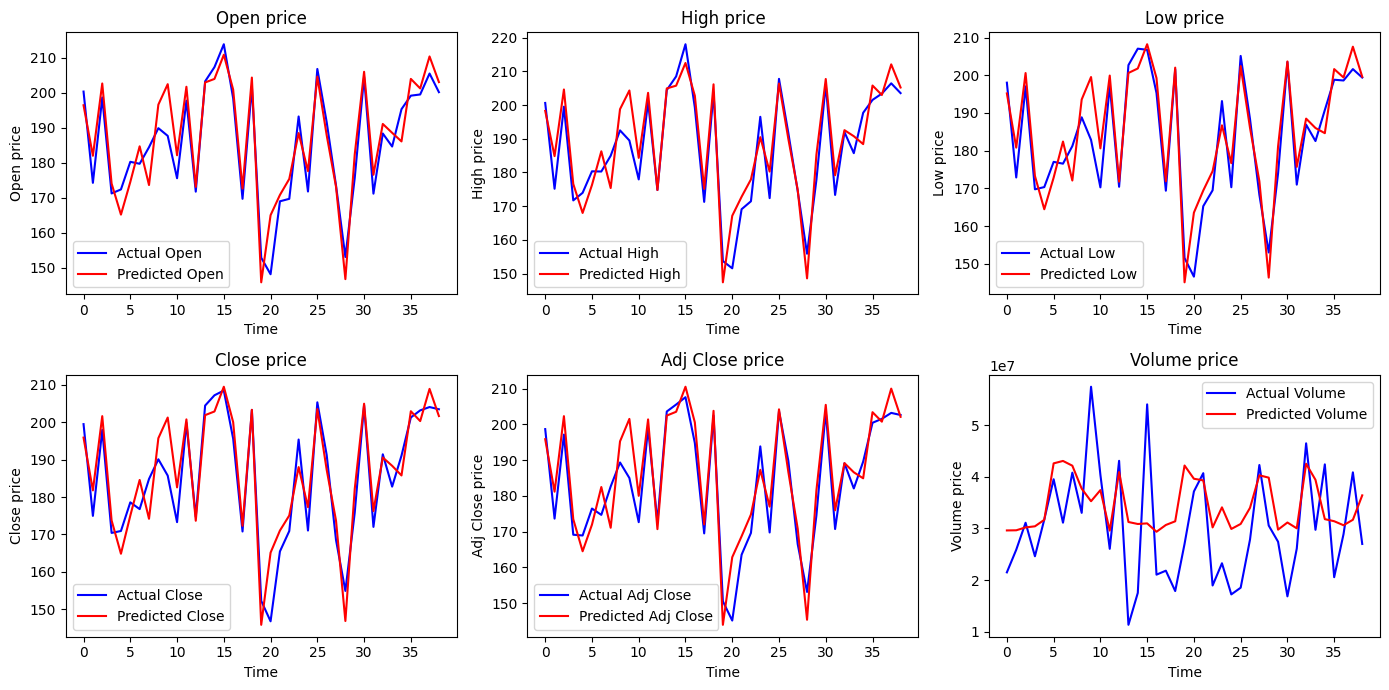

In [59]:
# plotting the results

plt.figure(figsize= (14,7))

for i, col in enumerate(df.columns):
    plt.subplot(2,3,i+1)
    plt.plot(y_test_rescale[:,i], color = "Blue", label = f'Actual {col}')
    plt.plot(predictions[:,i], color = "red", label = f'Predicted {col}')
    plt.title(f'{col} price')
    plt.xlabel('Time')
    plt.ylabel (f'{col} price')
    plt.legend()
    plt.tight_layout()